# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# ANALYSIS
#------------------------------------------------------------------------------------
# 1. The weight of mice correlates pretty well with the average volume of tumors found within them. It is unclear
# whether bigger mice are able to live longer with cancer/sustain a bigger tumor, or if the larger tumors were
# significantly heavier, thus causing the mice to weigh-in heavier.
# 2. The drugs Capomulin and Ramicane posted much lower average final tumor volumes than Infubinol and Ceftamin, so much
# so that the two pairs are (nearly) outside of each other's IQR.
# 3. Mouse s710 was treated with the Capomulin drug regimen and displayed an overall decline in the size of their tumor.
# A period of steady growth was observed in the middle of the treatment but rapid tumor shrinking was observed early and
# later on in the observation period.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df = combined_df[combined_df["Mouse ID"]!= "g989"]
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(combined_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drugs_df = combined_df.groupby("Drug Regimen")
tumors_mean = drugs_df["Tumor Volume (mm3)"].mean()
tumors_median = drugs_df["Tumor Volume (mm3)"].median()
tumors_variance = drugs_df["Tumor Volume (mm3)"].var()
tumors_standard = drugs_df["Tumor Volume (mm3)"].std()
tumors_SEM = drugs_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame([tumors_mean, tumors_median, tumors_variance,
                          tumors_standard, tumors_SEM]).T
summary_df.columns = ["Tumor Mean Volume",
                      "Tumor Median Volume",
                      "Tumor Variance",
                      "Tumor Standard Deviation",
                      "Tumor Standard Error"]
summary_df

,Tumor Mean Volume,Tumor Median Volume,Tumor Variance,Tumor Standard Deviation,Tumor Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggregate = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
combined_df.groupby("Drug Regimen").agg(aggregate)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

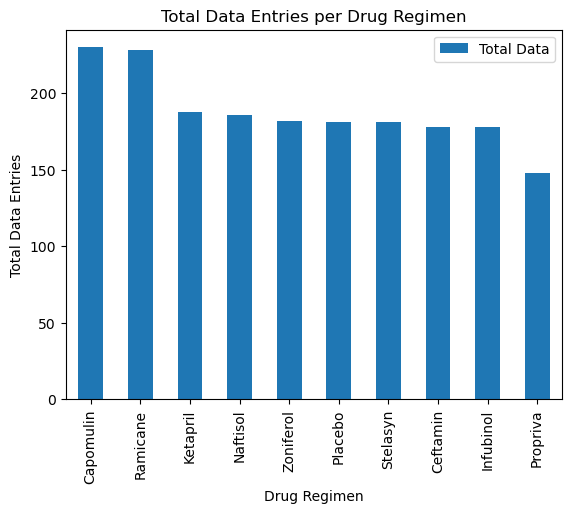

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_data = drugs_df["Drug Regimen"].count()
drug_data_df = pd.DataFrame(drug_data)
drug_data_df.columns = ["Total Data"]
drug_data_plot = drug_data_df.sort_values("Total Data", ascending = False).plot(kind = "bar")
drug_data_plot.set_xlabel("Drug Regimen")
drug_data_plot.set_ylabel("Total Data Entries")
plt.title("Total Data Entries per Drug Regimen")
plt.show()

Text(0, 0.5, 'Total Data Entries')

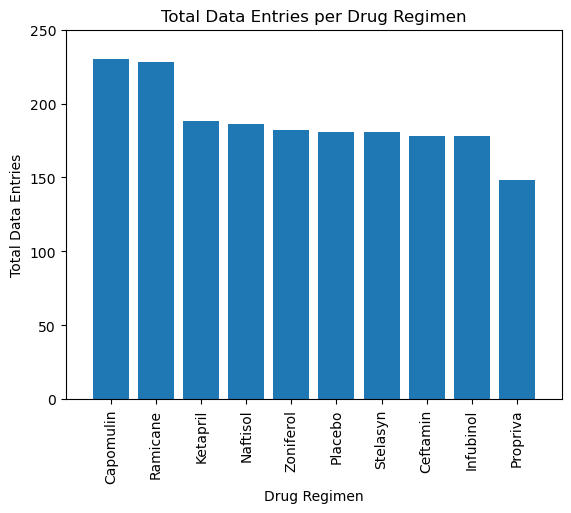

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_data_df))
ticks = [value for value in x_axis]
drug_data_df = drug_data_df.sort_values("Total Data", ascending = False)
plt.bar(x_axis, drug_data_df["Total Data"], align = "center")
plt.xticks(ticks, drug_data_df.index, rotation = "vertical")
plt.xlim(-1, len(x_axis))
plt.ylim(0, 250)
plt.title("Total Data Entries per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Data Entries")

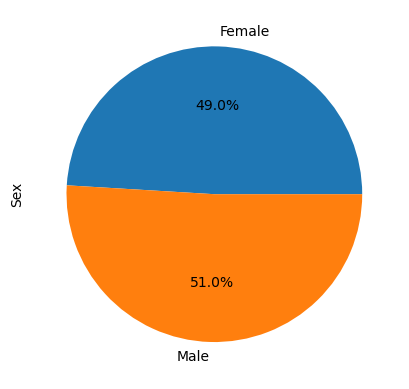

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders_df = combined_df.groupby("Sex")
sex_count = genders_df["Sex"].count()
sex_plot = sex_count.plot(kind = "pie", y = "Sex", autopct = "%1.1f%%")

<function matplotlib.pyplot.show(close=None, block=None)>

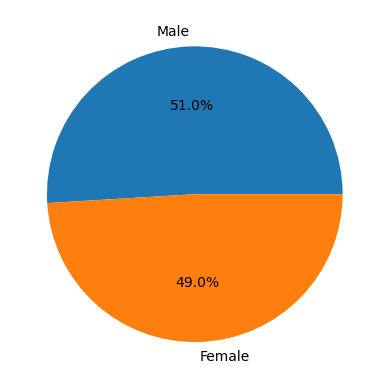

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
count = [sex_count["Male"], sex_count["Female"]]
plt.pie(count, labels = labels, autopct = "%1.1f%%")
plt.show

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = combined_df.groupby("Mouse ID")
last_time = last_time["Timepoint"].max()
last_time_df = pd.DataFrame(last_time)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_time_df, combined_df, on = ["Mouse ID", "Timepoint"])
tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capo_volume = []
rami_volume = []
infu_volume = []
ceft_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
volumes = [capo_volume, rami_volume, infu_volume, ceft_volume]
for x in range(len(tumor_volume_df) - 1):
    if tumor_volume_df.loc[x, "Drug Regimen"] == "Capomulin":
        capo_volume.append(tumor_volume_df.loc[x, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[x, "Drug Regimen"] == "Ramicane":
        rami_volume.append(tumor_volume_df.loc[x, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[x, "Drug Regimen"] == "Infubinol":
        infu_volume.append(tumor_volume_df.loc[x, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[x, "Drug Regimen"] == "Ceftamin":
        ceft_volume.append(tumor_volume_df.loc[x, "Tumor Volume (mm3)"])
        
all_volumes = [capo_volume, rami_volume, infu_volume, ceft_volume]
outliers = []

for x in range(len(all_volumes)):
    quartiles = pd.Series(all_volumes[x]).quantile([.25, .5, .75])
    lquartile = quartiles[.25]
    uquartile = quartiles[.75]
    iqr = uquartile - lquartile
    lower_bound = lquartile - (1.5*iqr)
    upper_bound = uquartile + (1.5*iqr)
    print(f"\n{drugs[x]}:")
    print(f"Lower Quartile: {lquartile}")
    print(f"Upper Quartile: {uquartile}")
    print(f"IQR: {iqr}")
    print(f"Median: {quartiles[.5]}")
    print(f"Outlier Lower Bound: {lower_bound}")
    print(f"Outlier Upper Bound: {upper_bound}")


Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Median: 38.1251644
Outlier Lower Bound: 20.70456164999999
Outlier Upper Bound: 51.83201549

Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Median: 36.56165229
Outlier Lower Bound: 17.912664470000003
Outlier Upper Bound: 54.30681135

Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Median: 60.16518046
Outlier Lower Bound: 36.83290494999999
Outlier Upper Bound: 82.74144559000001

Ceftamin:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Median: 59.85195552
Outlier Lower Bound: 25.355449580000002
Outlier Upper Bound: 87.66645829999999


C:\Users\dasam\AppData\Local\Temp\ipykernel_19204\4100023055.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drugs)


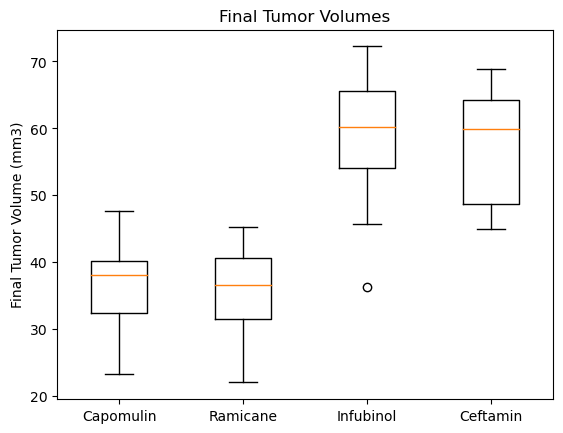

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(drugs)
ax1.boxplot(all_volumes)
plt.show()

## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == "Capomulin"]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [25]:
#Picking mouse s710 because "S seven ten" is fun to say and sounds like
# a secret agent codename
s710_data = combined_df.loc[combined_df["Mouse ID"] == "s710"]
s710_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
361,s710,Capomulin,Female,1,23,0,45.000000,0
362,s710,Capomulin,Female,1,23,5,43.180977,0
363,s710,Capomulin,Female,1,23,10,43.688026,0
364,s710,Capomulin,Female,1,23,15,41.845235,0
365,s710,Capomulin,Female,1,23,20,42.629963,1
366,s710,Capomulin,Female,1,23,25,43.060409,1
367,s710,Capomulin,Female,1,23,30,43.571703,1
368,s710,Capomulin,Female,1,23,35,44.160519,1
369,s710,Capomulin,Female,1,23,40,40.171920,1
370,s710,Capomulin,Female,1,23,45,40.728578,1


<function matplotlib.pyplot.show(close=None, block=None)>

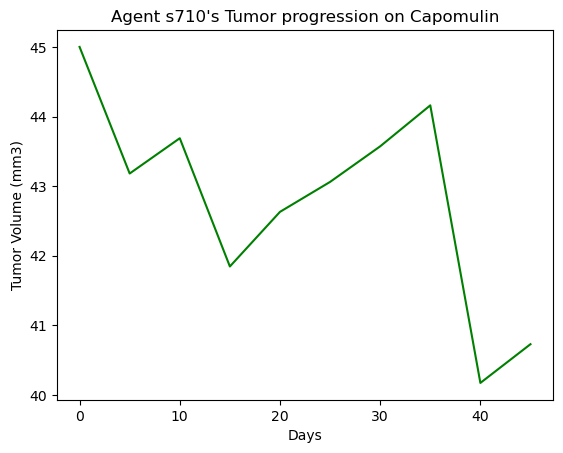

In [26]:
#Line plot
plt.plot(s710_data["Timepoint"], s710_data["Tumor Volume (mm3)"], color = "green")
plt.title("Agent s710's Tumor Progression on Capomulin")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

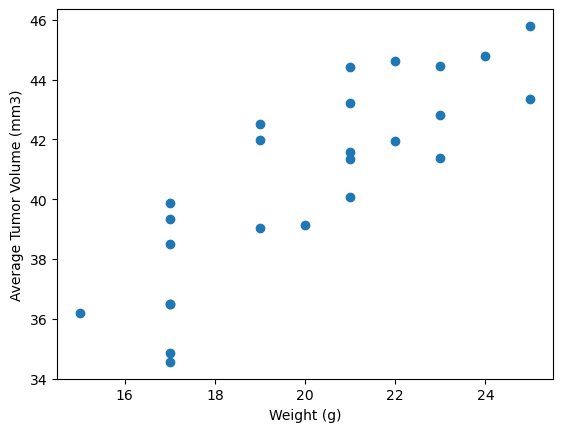

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
capomulin_average = capomulin_df["Tumor Volume (mm3)"].mean()
weight = capomulin_df["Weight (g)"].unique()
plt.scatter(weight, capomulin_average)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

In [28]:
capomulin_average

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

## Correlation and Regression

Correlation between weight and average tumor volume: 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

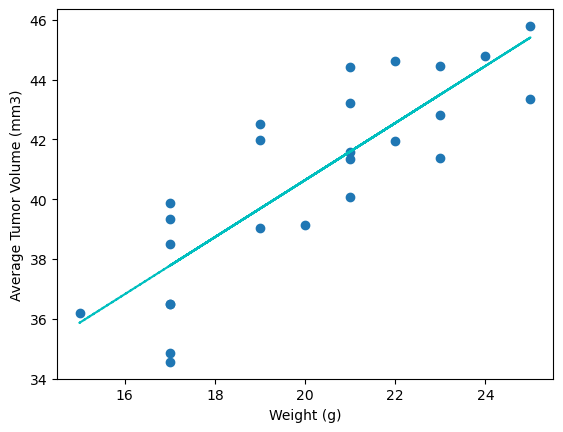

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = weight.astype(float)
correlation = st.pearsonr(weight, capomulin_average)
(slope, intercept, rvalue, pvalue, std_error) = st.linregress(weight, capomulin_average)
regression = weight * slope + intercept
plt.scatter(weight, capomulin_average)
plt.plot(weight, regression, "--", color = "c")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"Correlation between weight and average tumor volume: {round(correlation[0], 2)}")
plt.show